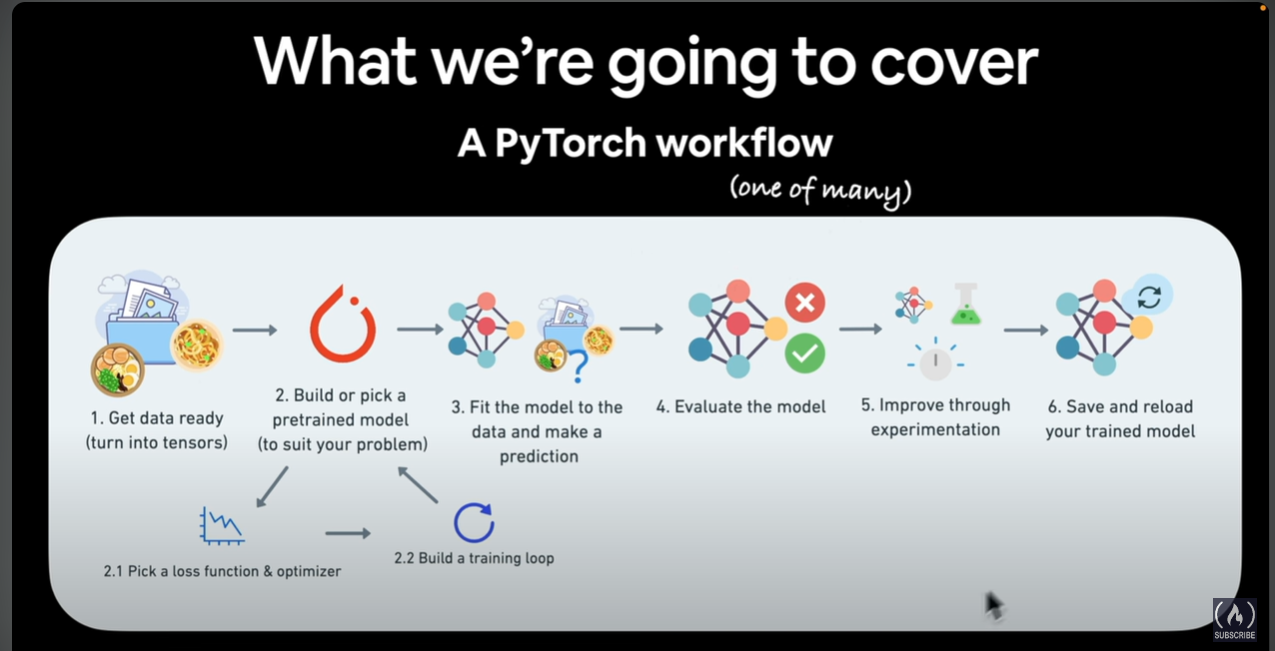

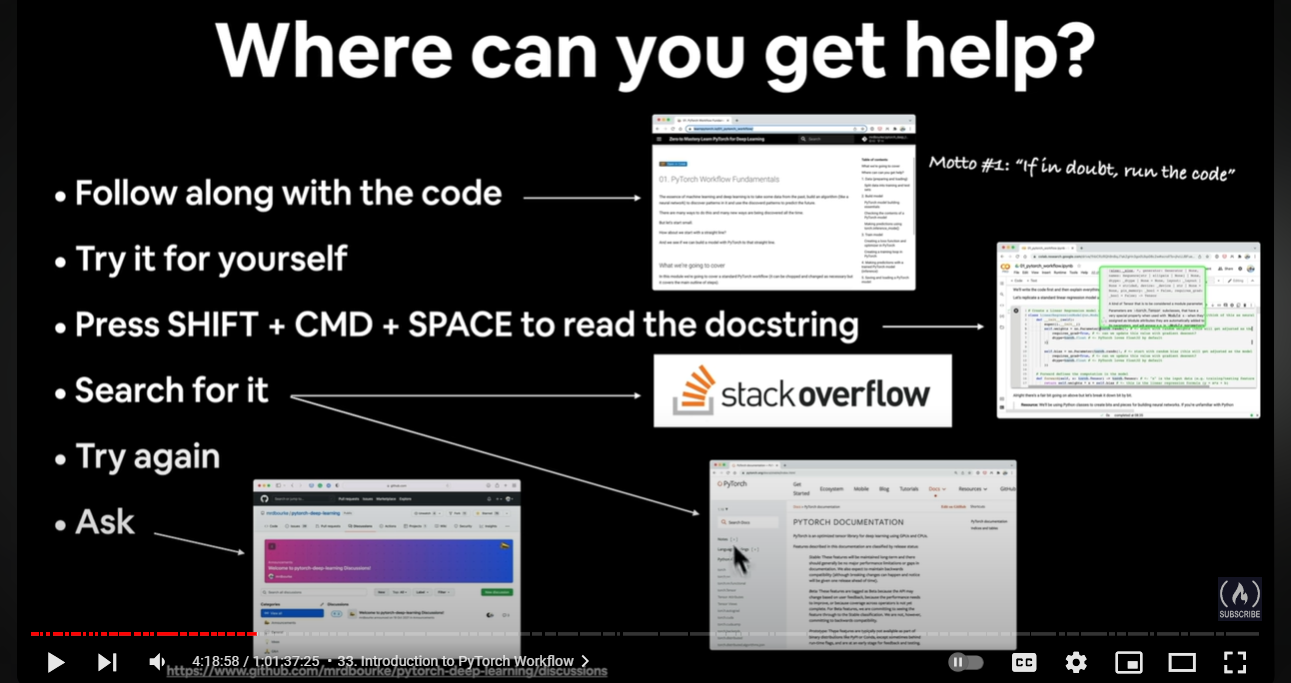

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu121'

* Get data into numerical representation
* build model to learn patter in the data

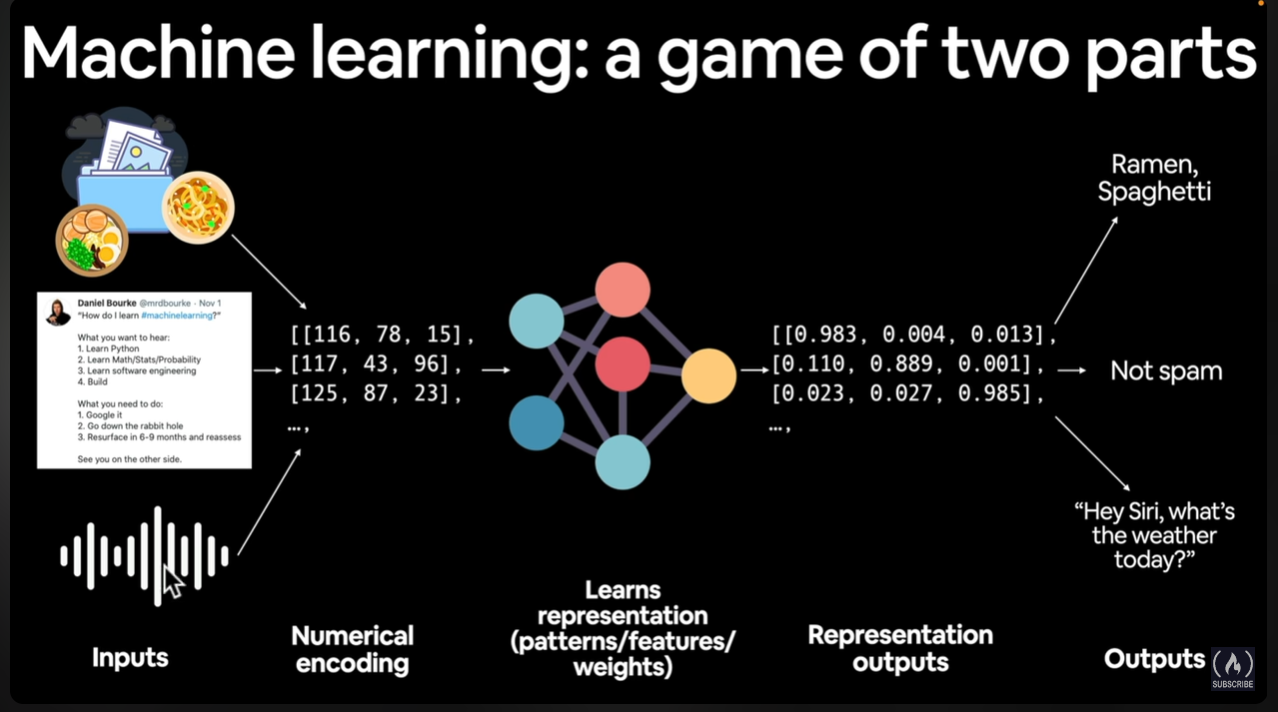

# Two known parameters
**Weights** =

**bias** =

Capital *X* represent Matrix or Tensor

smaller *y* represent vector

In [ ]:
#known parameters
weight=0.7
bias=0.3

#cretae
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#known parameters
weight=0.7
bias=0.3

#cretae
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=0)
y=weight*X+bias
X[:10] ,y[:10]

(tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
          0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
          0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
          0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
          0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
          0.9000, 0.9200, 0.9400, 0.9600, 0.9800]]),
 tensor([[0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
          0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
          0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
          0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
          0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
          0.9300, 0.9440, 0.9580, 0.9720, 0.9860]]))

In [ ]:
#known parameters
weight=0.7
bias=0.3

#cretae
start=0
end=1
step=0.02

X=torch.arange(start,end,step)
y=weight*X+bias
X[:10] ,y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [ ]:
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) ,len(y)

(50, 50)

#splitting data into training and testing set


In [ ]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_prediction(train_X=X_train,
                    train_y=y_train,
                    test_X=X_test,
                    test_y=y_test,
                    prediction=None):
  """plot training data, test data and compare prediction."""
  plt.figure(figsize=(10,7))
  #plot training data
  plt.scatter(train_X,train_y,c='b',s=4,label='Training Data')
  #plot testing data
  plt.scatter(test_X,test_y,c='g',s=4,label='Testing Data')
  if prediction is not None:
    #plot prediction if exists
    plt.scatter(test_X,prediction,c='r',s=4,label='Prediction')
    #show legend
  plt.legend(prop={'size':14}) #legend will show labels of the data



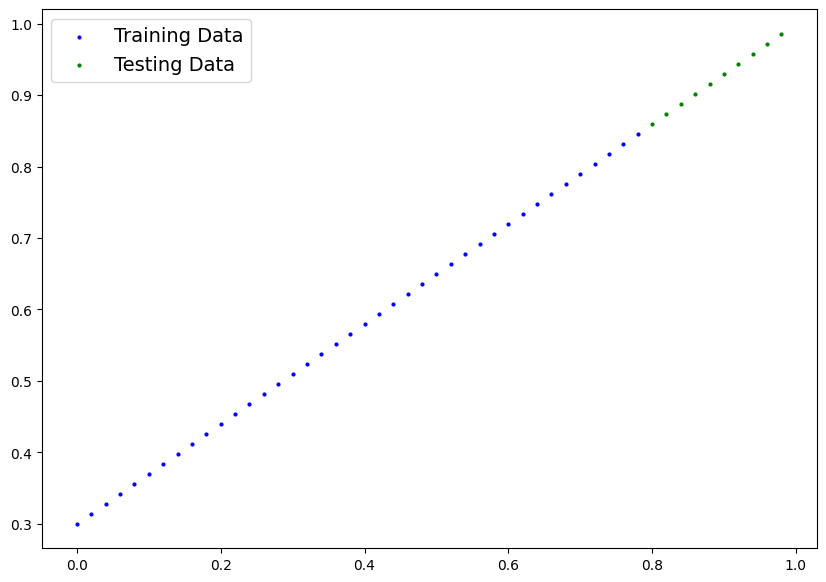

In [ ]:
plot_prediction()


#building first pytorch Model

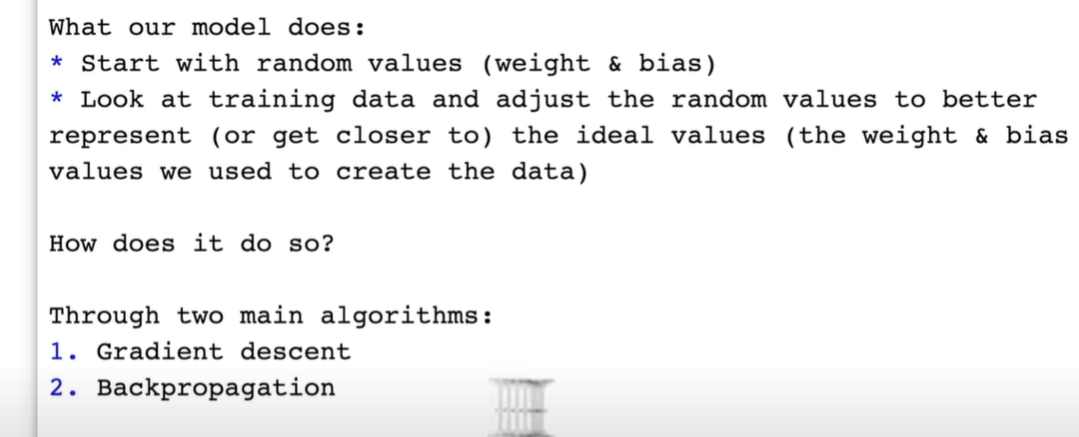

In [ ]:
import torch
from torch import nn
class LinearRegression(nn.Module):  # nn.Module contains all building blocks of Neural Network
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))
    # forward method to define computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias

torch.randn generates a tensor filled with random numbers drawn from a normal distribution (with mean 0 and variance 1).
In this case, torch.randn(1) creates a tensor of size 1 (a single value) drawn from the normal distribution.

requires_grad=True

requires_grad is a flag that controls whether the tensor should track its operations for automatic differentiation. This is crucial for backpropagation in neural networks.

If requires_grad=True:

The tensor will track all operations applied to it, so PyTorch can compute the gradient of this tensor with respect to some loss during backpropagation.
When you call backward() on the loss, PyTorch will automatically compute the gradients for this tensor and store them in the .grad attribute of the tensor.


If requires_grad=False:

The tensor will not track operations or compute gradients during backpropagation.

This is useful for parameters that are fixed and should not be updated (e.g., certain constants or frozen layers in a model).

Usage in context:

With requires_grad=True, the self.weights will be updated during the training process because PyTorch will compute its gradient and update it during optimization.

If requires_grad=False, the self.weights will not be updated, and they will remain constant throughout the training process.

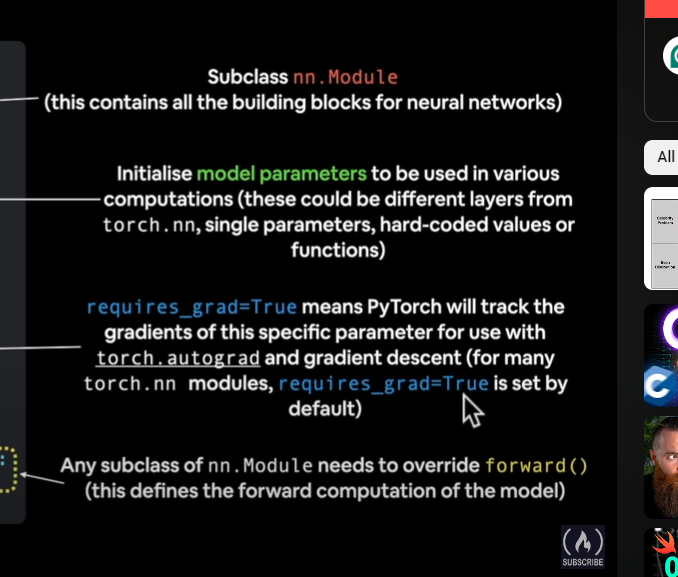

# **Gradient Descent**

Weights adjust how much importance is given to each input (like ingredients).


Bias is an adjustment to help the network get better results (like adding sweetness to balance the taste).

#pytorch model building essentials
* torch.nn -> containing building blocks of neural network
* torch.nn.parameters -> what parameters our model should learn
* torch.module -> base class of all neural network modules
* torch.optim -> contains optimizer algos
* def forward() -> All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).
* torch.utils.data.Dataset ->
* torch.utils.data.Dataloader- >

# checking inside the model


In [ ]:
torch.manual_seed(42)
model_0=LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
# list names parameters
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])


In [ ]:
y_pred_2=model_0(X_test)
y_pred_2

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]], grad_fn=<AddBackward0>)

In [ ]:
# making prediction using torch.inference mode()
with torch.inference_mode(): #turn off gradient tracking
  y_preds=model_0(X_test)


In [ ]:
#we can also do it with no grad function it will only not allow gradient tracking
with torch.no_grad():
  y_preds_3=model_0(X_test)

y_preds_3

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

**torch.inference_mode()** is a PyTorch context manager that is used to disable certain aspects of PyTorch's computation graph building process. Specifically, it turns off:

Autograd (Automatic Differentiation): Since you're making predictions (inference), you don't need to track gradients for backpropagation, which is typically used during training.
Memory consumption: inference_mode() reduces memory usage by disabling the storage of intermediate activations required for gradient computation.
Performance: This mode makes inference faster because it skips operations that are not necessary for inference.

This is useful when you just want to make predictions without updating model parameters or storing unnecessary intermediate computations. It is more efficient than the older torch.no_grad() method for inference.


In [ ]:
y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

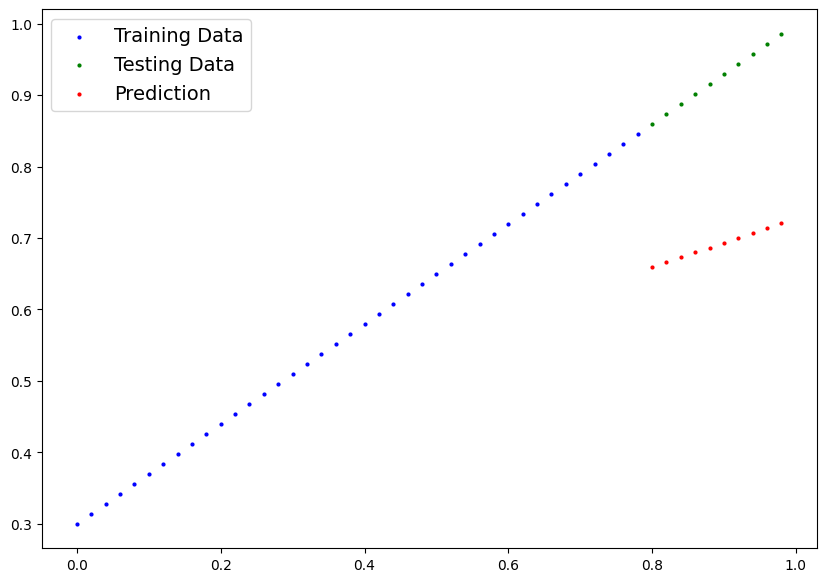

In [ ]:
plot_prediction(prediction=y_preds)

 # 43. Training a model with PyTorch (intuition building)

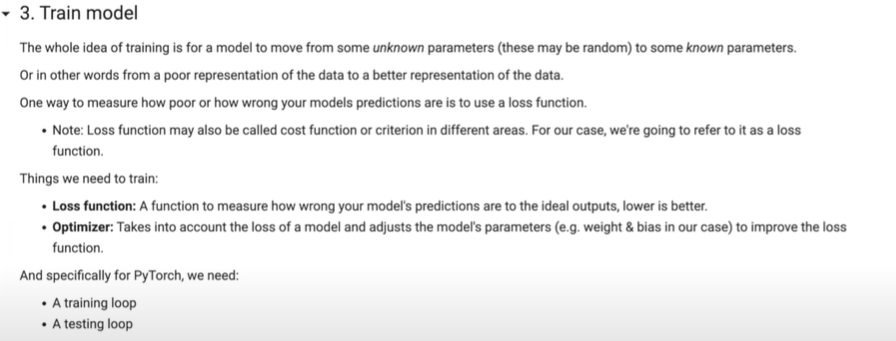

In [ ]:
#setup loss function
loss_fn=torch.nn.L1Loss() #calculate how wrong our model is predicting

#setup optimizer
optim_fn=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #optimize parameters in our model learning rate is how our parameters are upgrade by steping small or large


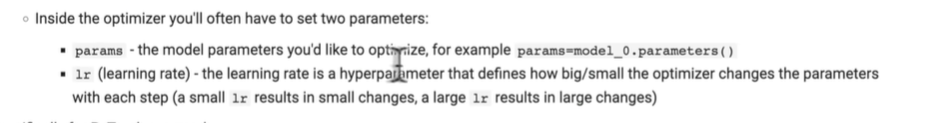

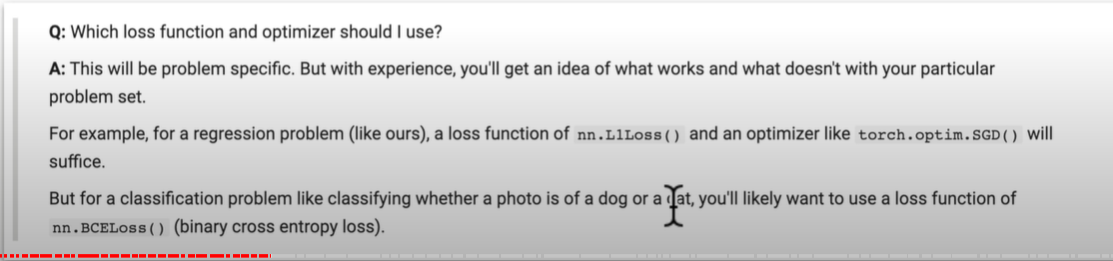

In [ ]:
torch.manual_seed(42)
epochs=100
epoch_count=[]
train_loss_values=[]
test_loss_valu=[]
#Training
for epoch in range(epochs):
  model_0.train() #set all parameters that requires gradient to gradient

  #1. Forwar pass
  y_pred=model_0(X_train)

  #2. calculate loss
  loss=loss_fn(y_pred,y_train)
  print(f"Loss : {loss}")

  #3. optimizer zero gradient
  optim_fn.zero_grad()

  #4. perform backpropagation on the loss wrt paramerters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optim_fn.step()

  #testing
  model_0.eval() #this turn off different settings that are not need for model evaluation

  with torch.inference_mode():
    #1. do the forward pass
    y_pred_test=model_0(X_test)
    #2. calculate the loss
    loss_test=loss_fn(y_pred_test,y_test)
    if epochs%10==0:
      epoch_count.append(epochs)
      train_loss_values.append(loss.detach().numpy())
      test_loss_valu.append(loss_test.detach().numpy())
      print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {loss_test}")
      print(model_0.state_dict)






Loss : 0.034646838903427124
Epoch : 0 | Loss : 0.034646838903427124 | Test loss : 0.08051808178424835
<bound method Module.state_dict of LinearRegression()>
Loss : 0.034307319670915604
Epoch : 1 | Loss : 0.034307319670915604 | Test loss : 0.07941607385873795
<bound method Module.state_dict of LinearRegression()>
Loss : 0.0339583158493042
Epoch : 2 | Loss : 0.0339583158493042 | Test loss : 0.07831406593322754
<bound method Module.state_dict of LinearRegression()>
Loss : 0.03362162038683891
Epoch : 3 | Loss : 0.03362162038683891 | Test loss : 0.07789894938468933
<bound method Module.state_dict of LinearRegression()>
Loss : 0.0332731194794178
Epoch : 4 | Loss : 0.0332731194794178 | Test loss : 0.07679693400859833
<bound method Module.state_dict of LinearRegression()>
Loss : 0.03293261304497719
Epoch : 5 | Loss : 0.03293261304497719 | Test loss : 0.07638178765773773
<bound method Module.state_dict of LinearRegression()>
Loss : 0.0325879231095314
Epoch : 6 | Loss : 0.0325879231095314 | Test

In PyTorch, the detach() method is used to create a new tensor that shares the same data but does not require gradients. This is particularly useful in scenarios where you want to perform operations on a tensor without affecting the computation graph used for backpropagation.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
weight,bias

(0.7, 0.3)

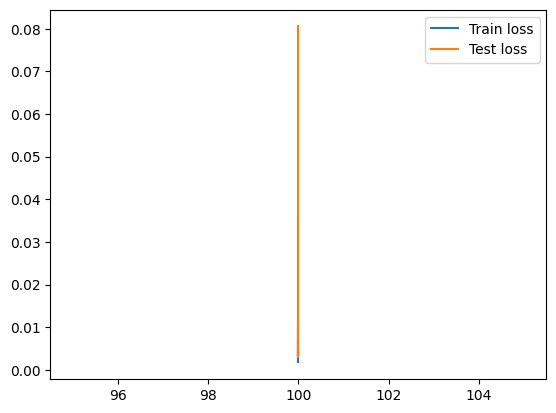

In [ ]:
#plot loss cuvre
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_valu,label="Test loss")
plt.legend()

In [ ]:
# making prediction using torch.inference mode()
with torch.inference_mode(): #turn off gradient tracking
  y_preds_new=model_0(X_test)


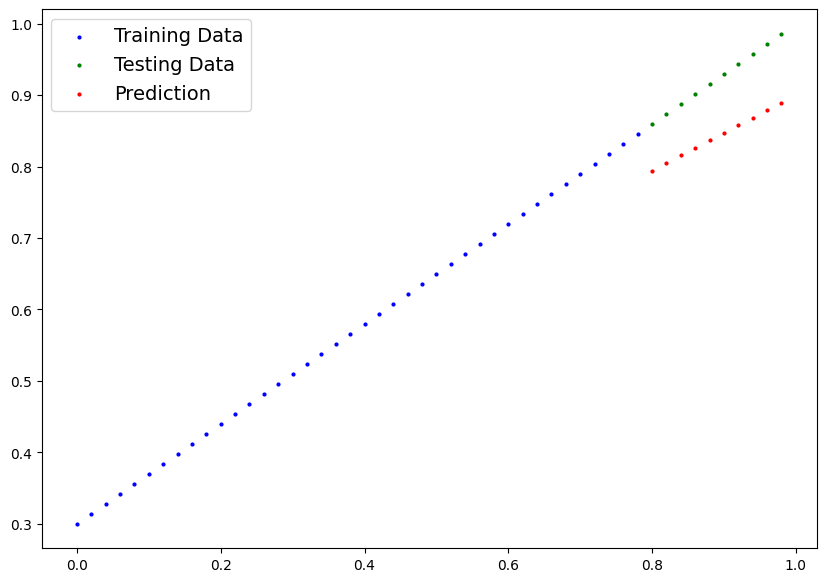

In [ ]:
plot_prediction(prediction=y_preds_new)

#saving and loading model


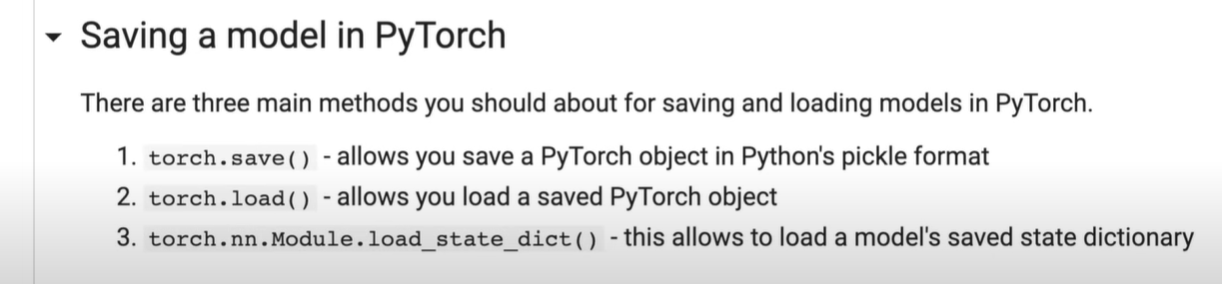

In [ ]:
from pathlib import Path
#create model directory
Model_path=Path("model")
#create model save path
Model_path.mkdir(parents=True,exist_ok=True)
Model_name="01_pytorch_workflowmodel.pth"
Model_save_path=Model_path/Model_name
#save the model save dict

print(f"Model Save Path : {Model_save_path}")
torch.save(obj=model_0.state_dict(),f=Model_save_path)

Model Save Path : model/01_pytorch_workflowmodel.pth


In [ ]:
ls -l model

total 4
-rw-r--r-- 1 root root 1662 Oct  5 10:49 01_pytorch_workflowmodel.pth


#loading a pytorch  model


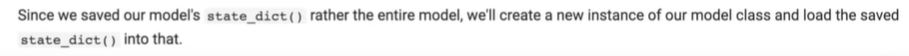

In [ ]:
load_model=LinearRegression()

load_model.load_state_dict(torch.load(f=Model_save_path))

<ipython-input-124-624d479742e2>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model.load_state_dict(torch.load(f=Model_save_path))


<All keys matched successfully>

In [ ]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
#make prediction with loaded model
load_model.eval()
with torch.inference_mode():
  load_pred=load_model(X_test)

load_pred

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [ ]:
#make prediction with loaded model
model_0.eval()
with torch.inference_mode():
  model_0_pred=model_0(X_test)

model_0_pred

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [ ]:
model_0_pred==load_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#putting it all together

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
